# About the Data


The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
Life_Data = pd.read_csv('Life Expectancy Data.csv')

### Data column description

- Country: Country
- Year: Year
- Status: Country Developed or Developing status
- Life expectancy: Life expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) -percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- : Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

In [3]:
Life_Data.shape

(2938, 22)

### Looking for Missing data 

In [4]:
Life_Data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Percentage of the missing data in each column

In [5]:
Life_Data.isna().sum()/len(Life_Data)

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

### Replacing the Null Values with mean values of the data



In [6]:
Life_Data[ 'Life expectancy '].fillna(float(Life_Data['Life expectancy '].mean()), inplace=True)
Life_Data['Adult Mortality'].fillna(float(Life_Data['Adult Mortality'].mean()), inplace=True)
Life_Data['Alcohol'].fillna(int(Life_Data['Alcohol'].mean()), inplace=True)
Life_Data['Hepatitis B'].fillna(int(Life_Data['Hepatitis B'].mean()), inplace=True)
Life_Data[' BMI '].fillna(int(Life_Data[' BMI '].mean()), inplace=True)
Life_Data['Polio'].fillna(int(Life_Data['Polio'].mean()), inplace=True)
Life_Data['Total expenditure'].fillna(int(Life_Data['Total expenditure'].mean()), inplace=True)
Life_Data['Diphtheria '].fillna(int(Life_Data['Diphtheria '].mean()), inplace=True)
Life_Data['GDP'].fillna(int(Life_Data['GDP'].mean()), inplace=True)
Life_Data['Population'].fillna(int(Life_Data['Population'].mean()), inplace=True)
Life_Data['Income composition of resources'].fillna(float(Life_Data['Income composition of resources'].mean()), inplace=True)
Life_Data['Population'].fillna(int(Life_Data['Population'].mean()), inplace=True)
Life_Data[' thinness  1-19 years'].fillna(float(Life_Data[' thinness  1-19 years'].mean()), inplace=True)
Life_Data[' thinness 5-9 years'].fillna(float(Life_Data[' thinness 5-9 years'].mean()), inplace=True)
Life_Data['Schooling'].fillna(float(Life_Data['Schooling'].mean()), inplace=True)

In [7]:
Life_Data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [8]:
Life_Data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.563053,738.251295,80.763445,2419.592240,38.317529,42.035739,82.546630,5.866021,82.321988,1.742103,7483.134305,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.919149,1987.914858,22.589847,11467.272489,19.927706,160.445548,23.352184,2.413262,23.640087,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.000000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.540000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.000000,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Correlation plot to see the correlation between the columns 


<AxesSubplot:>

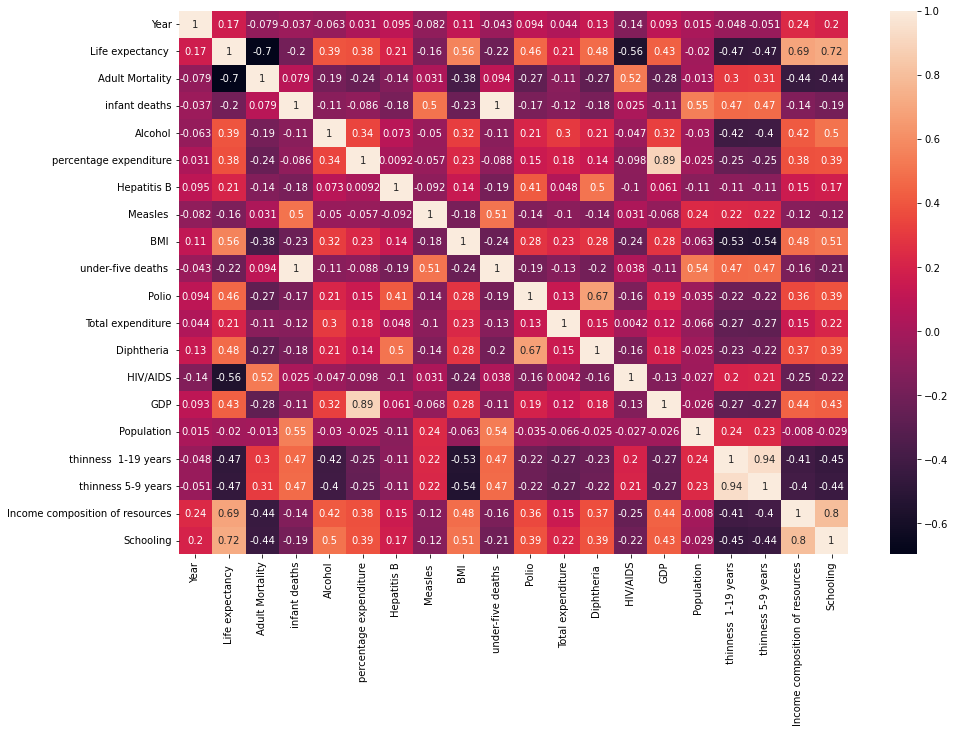

In [9]:
plt.figure(figsize=(15,10))
correlations = Life_Data.corr()
sns.heatmap(correlations,annot=True)

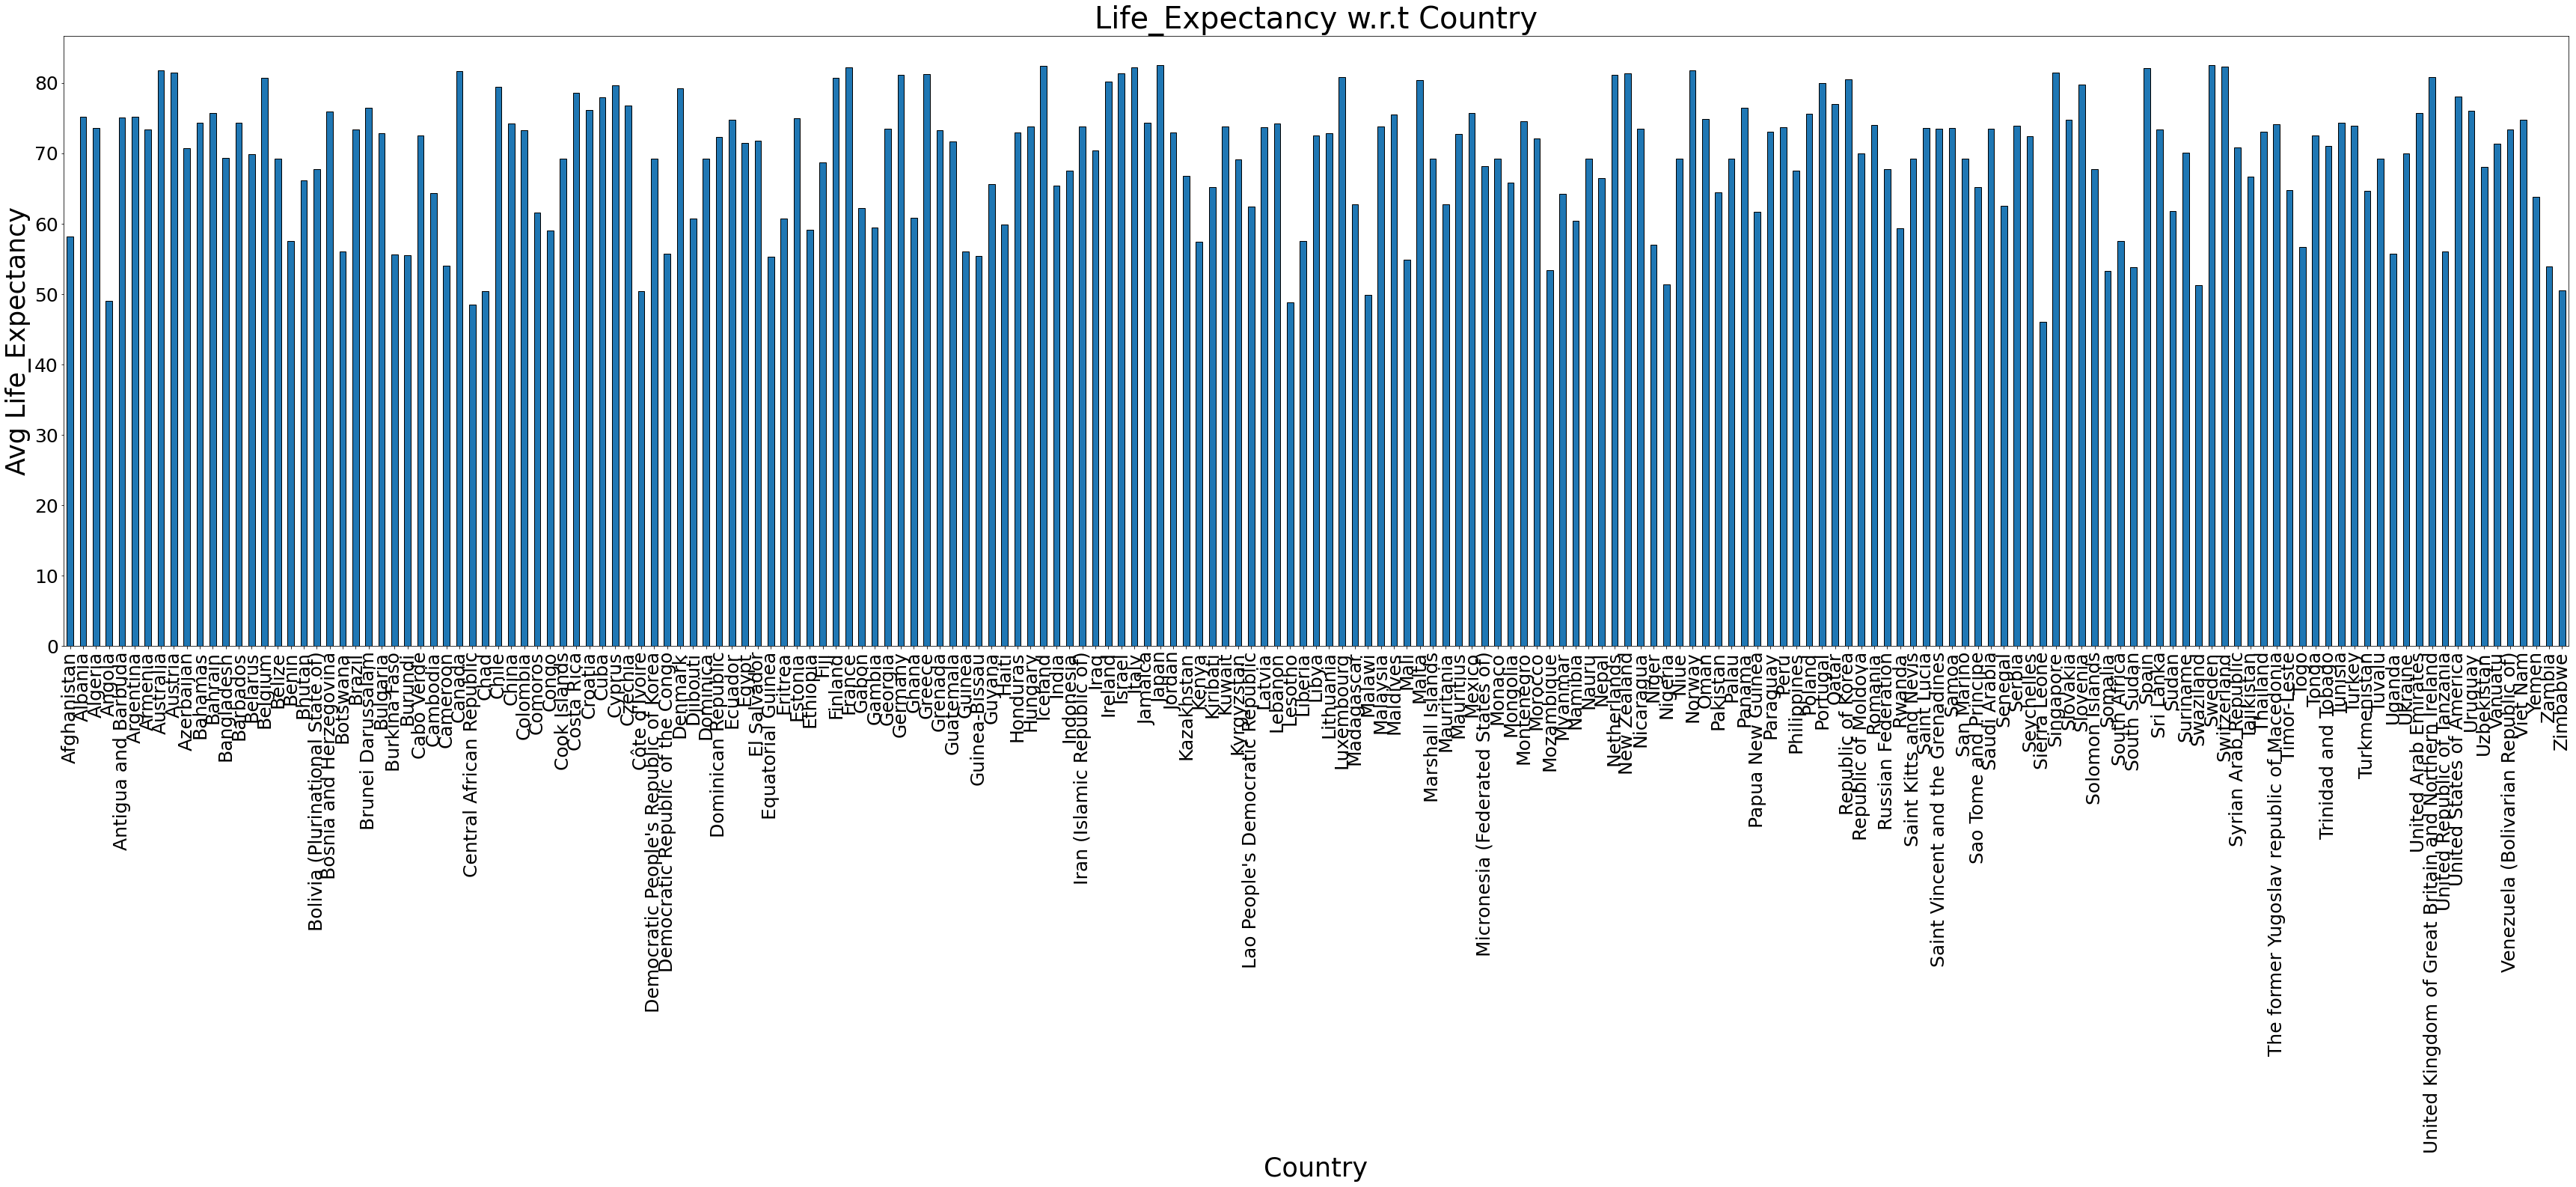

In [10]:
country = Life_Data.groupby('Country')['Life expectancy '].mean()
country.plot(kind='bar', figsize=(60,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

### Distribution of each variable 

Feature: Year


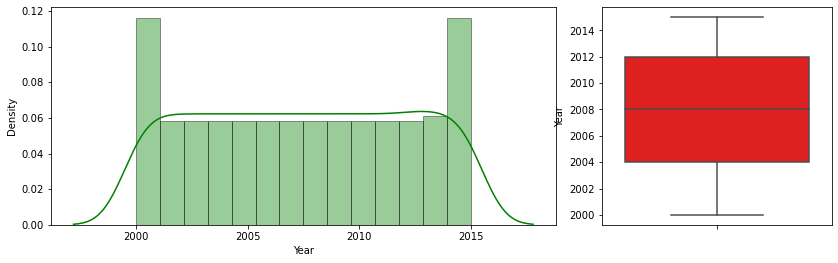

Feature: Life expectancy 


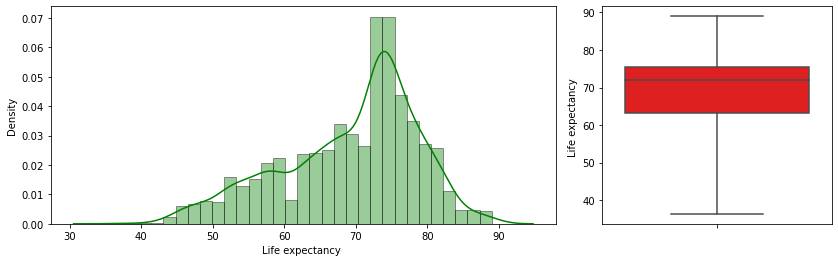

Feature: Adult Mortality


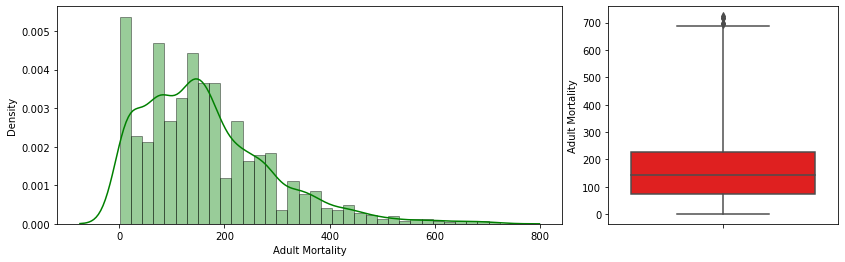

Feature: infant deaths


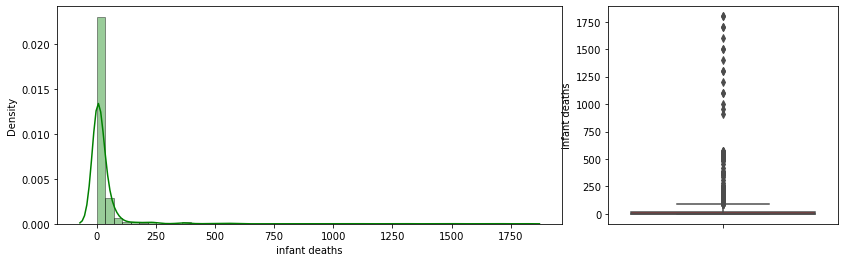

Feature: Alcohol


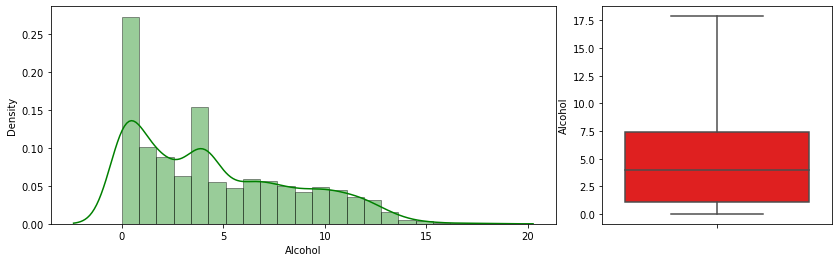

Feature: percentage expenditure


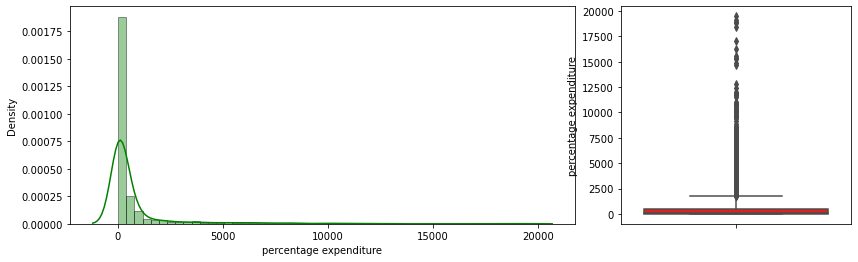

Feature: Hepatitis B


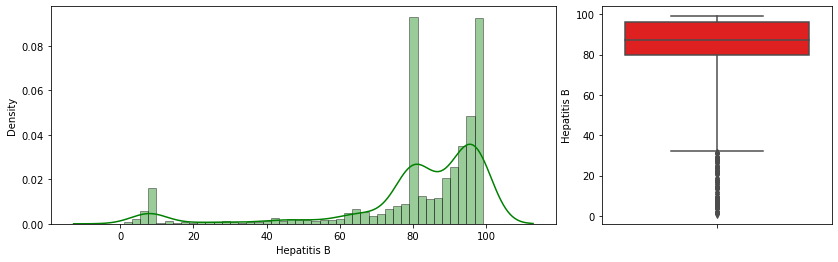

Feature: Measles 


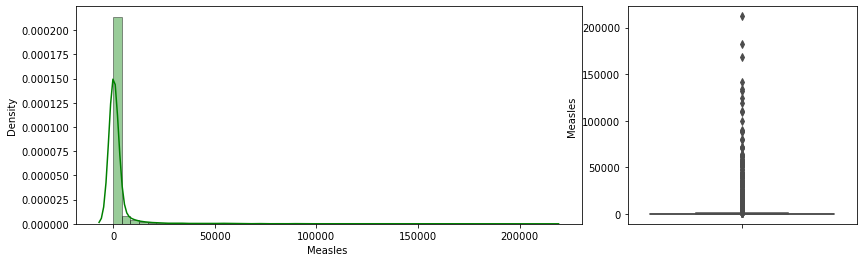

Feature:  BMI 


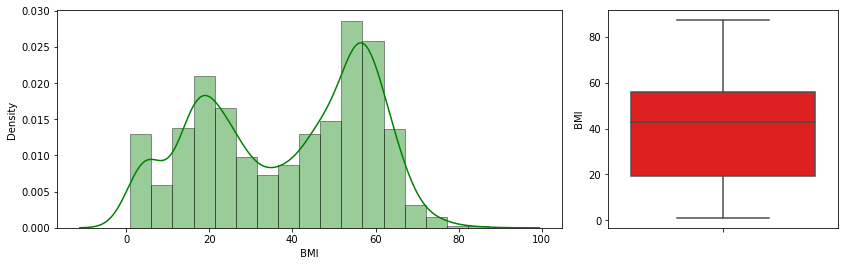

Feature: under-five deaths 


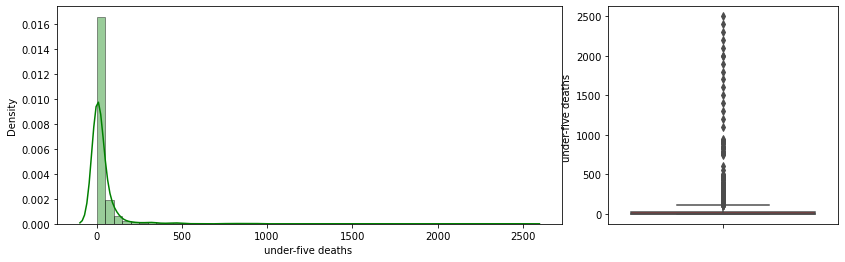

Feature: Polio


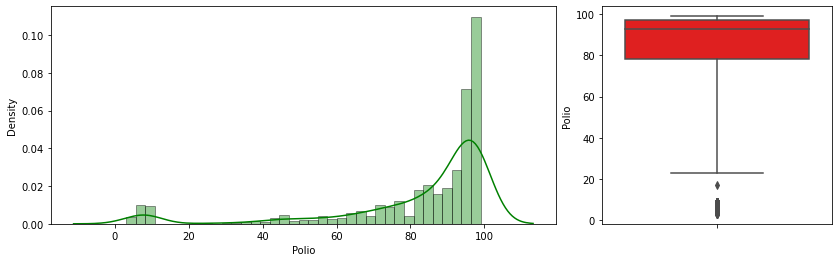

Feature: Total expenditure


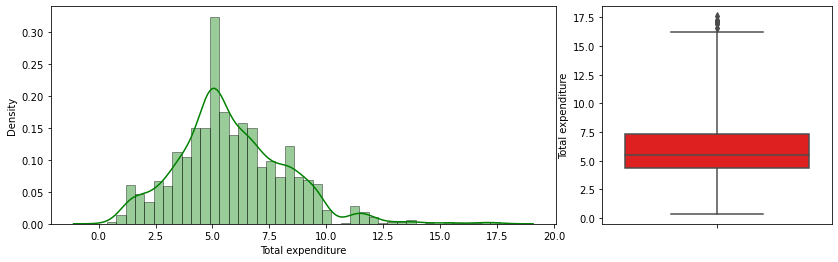

Feature: Diphtheria 


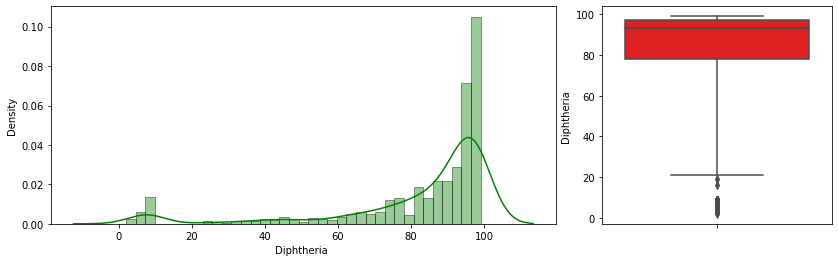

Feature:  HIV/AIDS


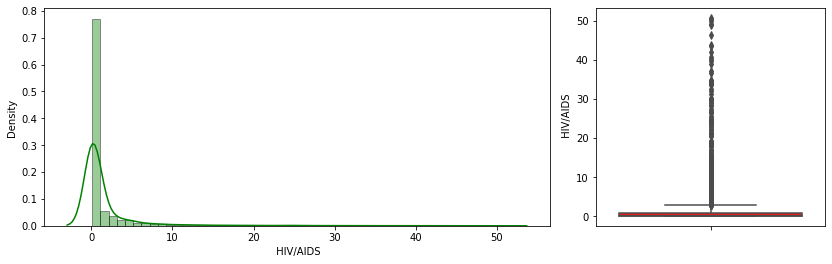

Feature: GDP


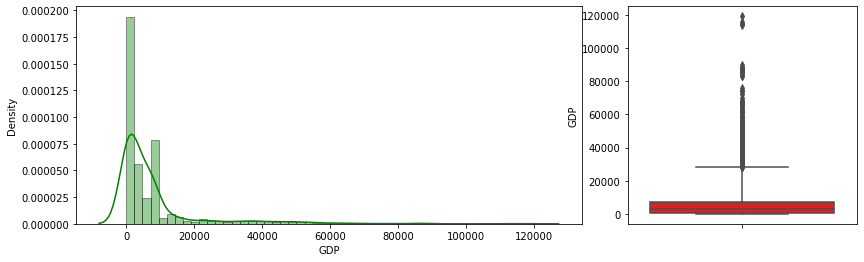

Feature: Population


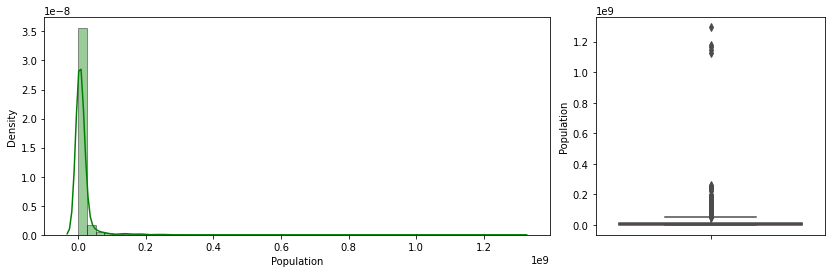

Feature:  thinness  1-19 years


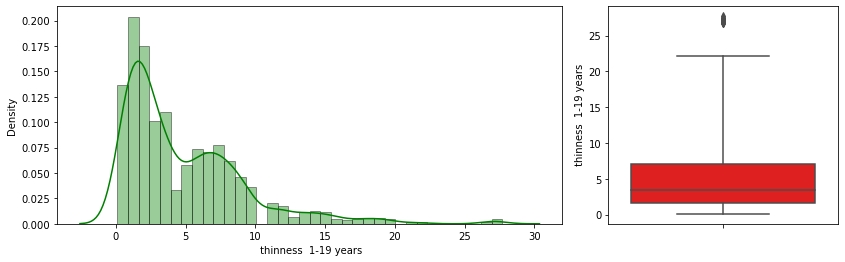

Feature:  thinness 5-9 years


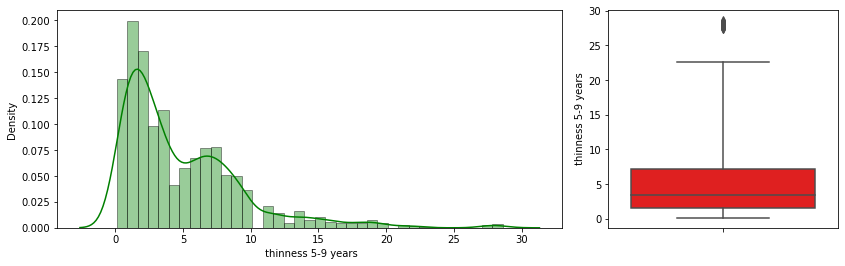

Feature: Income composition of resources


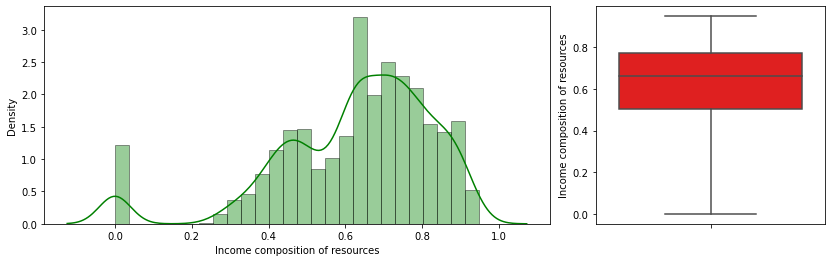

Feature: Schooling


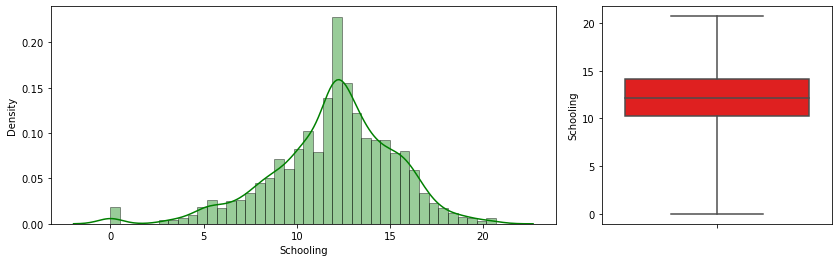

In [11]:
for x in Life_Data.select_dtypes(['int64','float64']).columns:
    fig = plt.figure(figsize=(14,4))
    gs = fig.add_gridspec(3,3)
    ax1 = fig.add_subplot(gs[:3,0:2])
    ax2 = fig.add_subplot(gs[:3,2])
    
    print('Feature: {}'.format(x))
    sns.distplot(Life_Data[x], ax = ax1, kde = True, color='green')
           
    sns.boxplot(y = x,data = Life_Data, ax = ax2,whis=3,color='red')
    
    plt.show()


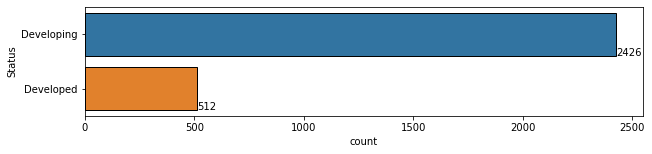

In [12]:
plt.figure(figsize = (10,2))
bar_plot1 = sns.countplot(y = Life_Data['Status']);
for p in bar_plot1.patches:
        x_value = p.get_width()
        y_value = p.get_y() + p.get_height()
        bar_plot1.text(x_value, y_value, x_value)

## Scatter plots to see the variation of life expectancy with other variables

<AxesSubplot:xlabel='Life expectancy ', ylabel='Adult Mortality'>

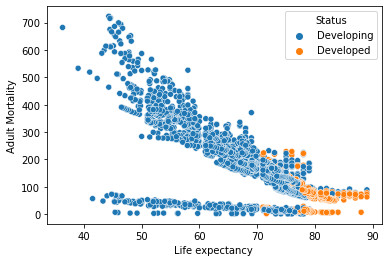

In [13]:
sns.scatterplot(data = Life_Data,x = "Life expectancy " ,y = "Adult Mortality", hue = "Status" )

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

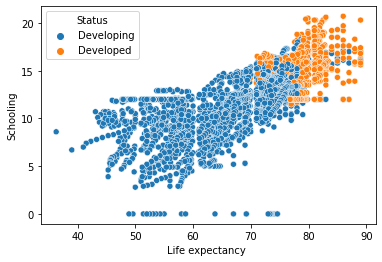

In [14]:
sns.scatterplot(data = Life_Data,x = "Life expectancy " ,y = "Schooling", hue = "Status" )

<AxesSubplot:xlabel='Life expectancy ', ylabel=' HIV/AIDS'>

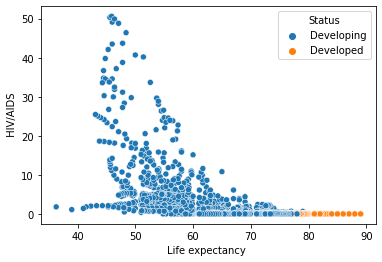

In [15]:
sns.scatterplot(data = Life_Data,x = "Life expectancy " ,y = " HIV/AIDS", hue = "Status" )

<AxesSubplot:xlabel='Life expectancy ', ylabel=' BMI '>

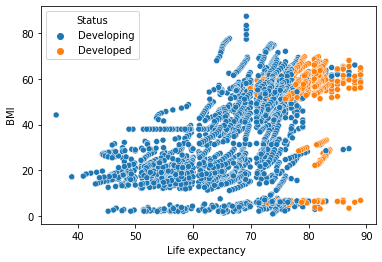

In [16]:
sns.scatterplot(data = Life_Data,x = "Life expectancy " ,y = " BMI ", hue = "Status" )

<AxesSubplot:xlabel='Life expectancy ', ylabel='Income composition of resources'>

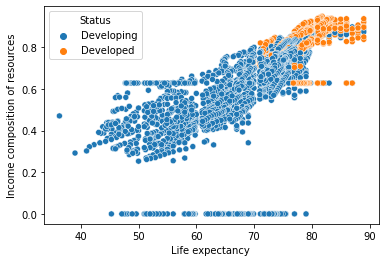

In [17]:
sns.scatterplot(data = Life_Data,x = "Life expectancy " ,y = "Income composition of resources", hue = "Status" )

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

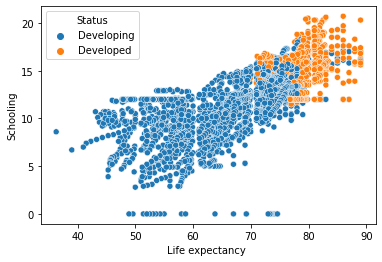

In [18]:
sns.scatterplot(data = Life_Data,x = "Life expectancy " ,y = "Schooling", hue = "Status" )

# Linear Regression


In [19]:
X=Life_Data.drop('Life expectancy ',axis=1)

In [20]:
Y=Life_Data['Life expectancy ']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2938 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [22]:
X['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
     

In [23]:
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

## Converting Categorical Variables into Numeric

In [24]:
Country_dummy=pd.get_dummies(X['Country'])

In [25]:
X['Status'].replace(['Developing', 'Developed'],
                        [0, 1], inplace=True)

In [26]:
X.drop(['Country'],inplace=True,axis=1)

In [27]:
X=pd.concat([X,Country_dummy],axis=1)

In [28]:
X.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,0
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,0


## Splitting Test and Train Data


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [31]:
X_train.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
2492,2012,0,412.0,2,0.01,720.233393,95.0,0,3.7,3,...,0,0,0,0,0,0,0,0,0,0
1222,2011,0,93.0,22,0.03,0.000000,99.0,73,54.8,25,...,0,0,0,0,0,0,0,0,0,0
1113,2008,0,218.0,1,7.32,493.327929,93.0,0,4.9,1,...,0,0,0,0,0,0,0,0,0,0
310,2009,0,27.0,10,3.87,0.000000,93.0,0,48.6,12,...,0,0,0,0,0,0,0,0,0,0
2552,2000,0,136.0,10,1.41,81.727471,79.0,146,43.9,12,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train.head()

2492    56.5
1222    74.7
1113    66.3
310     68.0
2552    72.6
Name: Life expectancy , dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression
Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)

LinearRegression()

In [34]:
predictions1=Linear_model.predict(X_test)

In [35]:
predictions1[0:10]

array([ 52.68737372,  54.34468112,  83.48647692,  63.44297739,
        73.49093085,  72.45557075,  69.13941841,  80.29392133,
        60.65488217,  82.88884792])

In [36]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,predictions1))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,predictions1))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test,predictions1)))

Mean Absolute Error:  1.21366718887
Mean Squared Error:  3.68668062317
Root Mean Squared Error:  1.92007307756


In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,predictions1)

0.95739993770150222